### Importing Libraries

Install dependencies via `pip install -r requirements.txt`

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

### Dataset understanding 

The dataset contains three tables: calendar, listings, and reviews.

- `calender.csv`: This file contains the price and availability of each property listing for the next 365 days.
- `listing.csv`: This file contains the attributes of each property listing.
- `reviews.csv`: This file contains the reviews left by customers.

(In this analysis, I will only use the `listing.csv` and `reviews.csv` files.)

In [27]:
listings_df = pd.read_csv('./data/listings.csv')
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [14]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [15]:
listings_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


The file `listings.csv` includes 3818 rows and 92 columns.

Inspect the data, we observe that there are number of columns which have high portion of missing values (more than 90%). Beside, the formating of the price and date columns are not useable.

To clean the data, we need to:
- Remove duplicate (rows,) columns
- Remove empty columns
- Remove columns that have high portion of missing values
- Transform columns to right format

In [28]:
# Remove duplicates columns
listings_df = listings_df.T.drop_duplicates().T

# Remove columns with all missing values
listings_df.dropna(axis=1, how='all', inplace=True)

# Remove columns with one unique value
_columns = [col for col in listings_df.columns if listings_df[col].nunique()==1]
listings_df.drop(_columns, axis=1, inplace=True)

# Remove columns representing url
listings_df.drop(listings_df.columns[listings_df.columns.str.contains("url")], axis=1, inplace=True)

In [39]:
# Transform money cols to float
def remove_money_symbol(example):
    example = str(example).replace(r"$","").replace(",","")
    return float(example)

In [40]:
for col in ['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people']:
    listings_df[col] = listings_df[col].apply(remove_money_symbol)

In [41]:
# Dropping specified columns with high missing values
columns_to_drop = [
    'square_feet', 'summary', 'space', 'neighborhood_overview', 'notes', 'transit',
]

# Dropping host-related information (selecting by pattern)
host_related_columns = listings_df.columns[listings_df.columns.str.contains('^host_')]
columns_to_drop.extend(host_related_columns)

# Dropping the columns
listings_df.drop(columns=columns_to_drop, inplace=True)

In [43]:
# Listing the numerical and categorical columns
numerical_columns = listings_df.select_dtypes(exclude=object).columns.tolist()
categorical_columns = listings_df.select_dtypes(include=object).columns.tolist()

In [45]:
# Dealing With Null Values

# Numeric columns: Use median imputation
numeric_imputer = SimpleImputer(strategy='median')
listings_df[numerical_columns] = numeric_imputer.fit_transform(listings_df[numerical_columns])

# Categorical columns with mode imputation
categorical_imputer = SimpleImputer(strategy='most_frequent')
listings_df[categorical_columns] = categorical_imputer.fit_transform(listings_df[categorical_columns])

### EDA

In [46]:
listings_df.describe()

,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people
count,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000
mean,127.976166,722.867994,2364.230225,268.381613,58.551598,10.667627
std,90.250022,392.261900,1104.088547,189.819736,42.047668,17.585922
min,20.000000,100.000000,500.000000,95.000000,5.000000,0.000000
25%,75.000000,620.000000,2200.000000,250.000000,35.000000,0.000000
50%,100.000000,650.000000,2200.000000,250.000000,50.000000,0.000000
75%,150.000000,671.500000,2200.000000,250.000000,65.000000,20.000000
max,1000.000000,6300.000000,19500.000000,5000.000000,300.000000,300.000000


In [49]:
# Estimating occupancy rates
average_annual_availability = listings_df['availability_365'].mean()
estimated_annual_occupancy_rate = 100 - (average_annual_availability / 365 * 100)
print("The estimated annual occupancy rate is: {:.2f}%".format(estimated_annual_occupancy_rate))

The estimated annual occupancy rate is: 32.94%


In [63]:
# Distribution of Property Types
sns.set_style("white")  # Set the aesthetic style of the plots


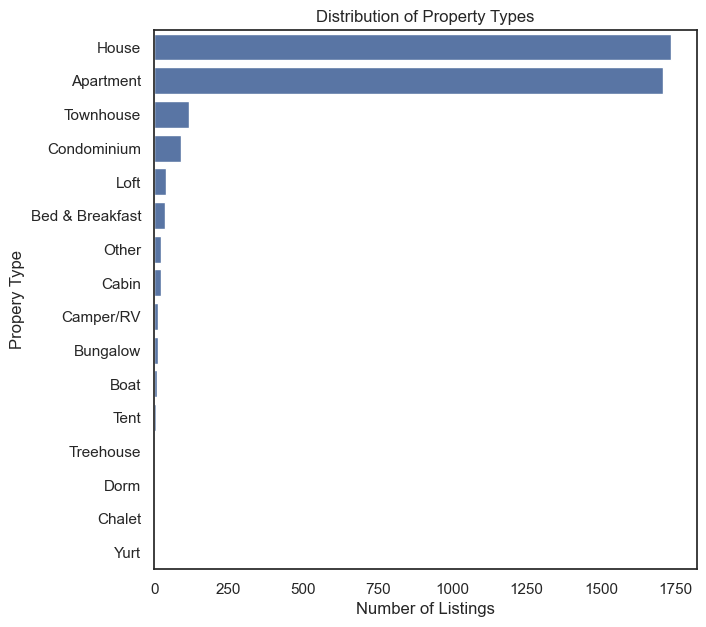

In [157]:
plt.rcParams['figure.figsize'] = (7, 7)

# Calculate teh distribution of the property types
property_type_counts = listings_df['property_type'].value_counts()

# Create a bar chart for the distribution of propery types

sns.barplot(x=property_type_counts.values, 
            y=property_type_counts.index, 
            # hue=property_type_counts.index,
            # palette="Blues_d",
            legend=False)
plt.title("Distribution of Property Types")
plt.xlabel("Number of Listings")
plt.ylabel("Propery Type")
plt.savefig('property_type_distribution.png')
plt.show()

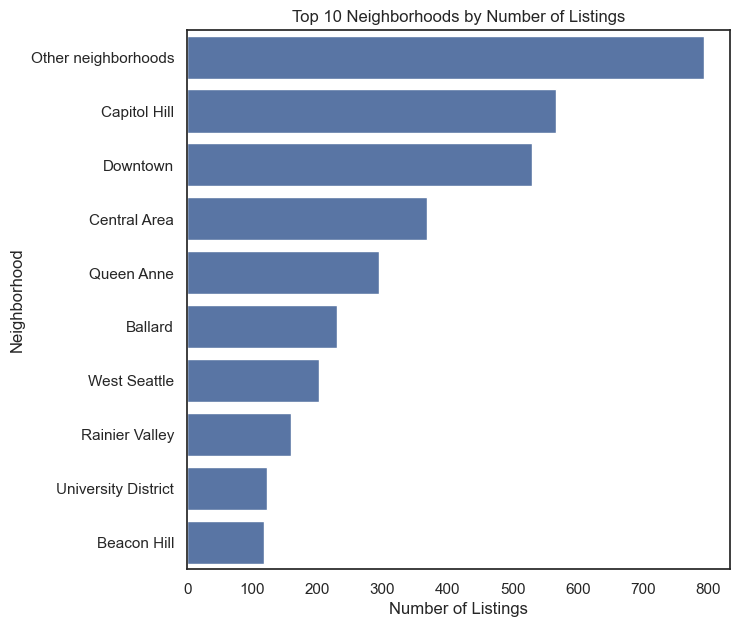

In [158]:
# Distribution of Neighborhoods
plt.figure(figsize=(7, 7))
neighborhood_counts = listings_df['neighbourhood_group_cleansed'].value_counts().head(10) # Calculate the distribution of listings by neighborhood

# Create a bar chart for the top neighborhoods with the most listings
sns.barplot(x=neighborhood_counts.values, y=neighborhood_counts.index)
plt.title('Top 10 Neighborhoods by Number of Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Neighborhood')
plt.savefig('Top 10 Neighborhoods by Number of Listings.png')
plt.show()

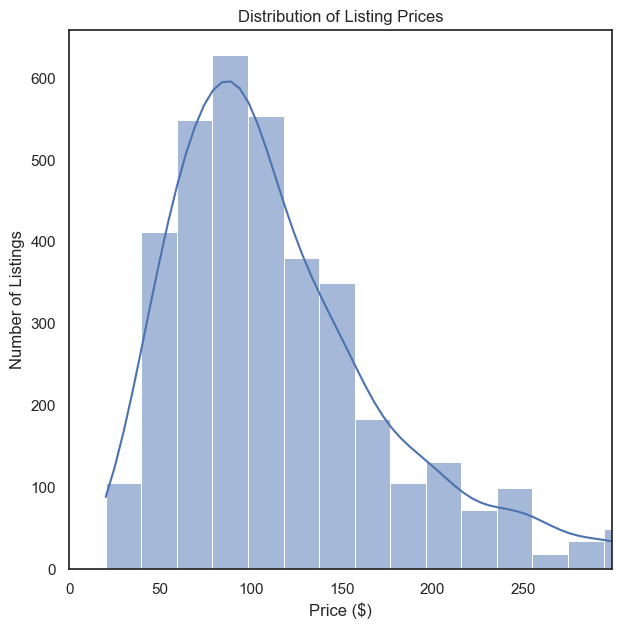

In [159]:
# Price Distribution
plt.figure(figsize=(7, 7))
sns.histplot(listings_df['price'], bins=50, kde=True)
plt.title('Distribution of Listing Prices')
plt.xlabel('Price ($)')
plt.ylabel('Number of Listings')
plt.xlim(0, listings_df['price'].quantile(0.95))  # Limiting x-axis to 95th percentile for better visualization
plt.savefig('price_distribution.png')
plt.show()

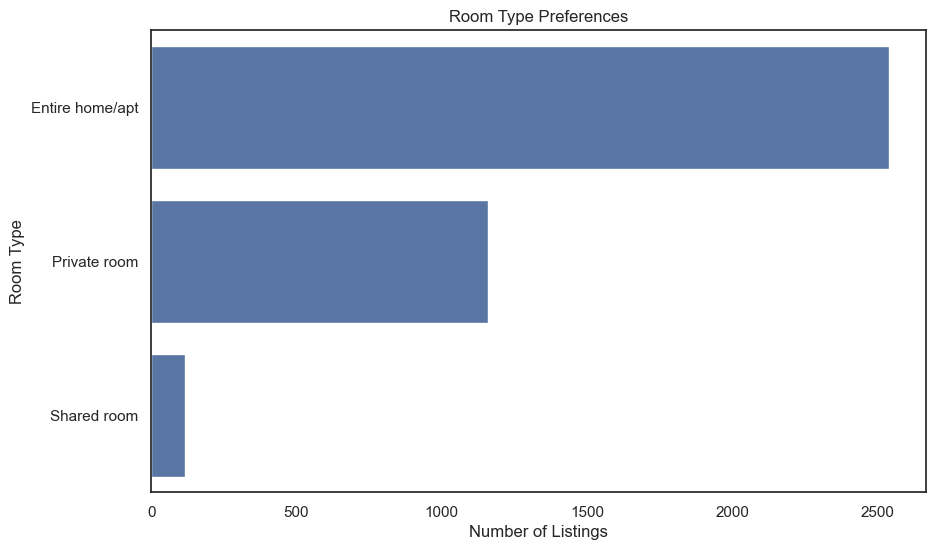

In [160]:
# Room Type Preferences
plt.figure(figsize=(10, 6))
sns.countplot(data=listings_df, y='room_type', order=listings_df['room_type'].value_counts().index)
plt.title('Room Type Preferences')
plt.xlabel('Number of Listings')
plt.ylabel('Room Type')
plt.savefig('room_type_preferences.png')
plt.show()

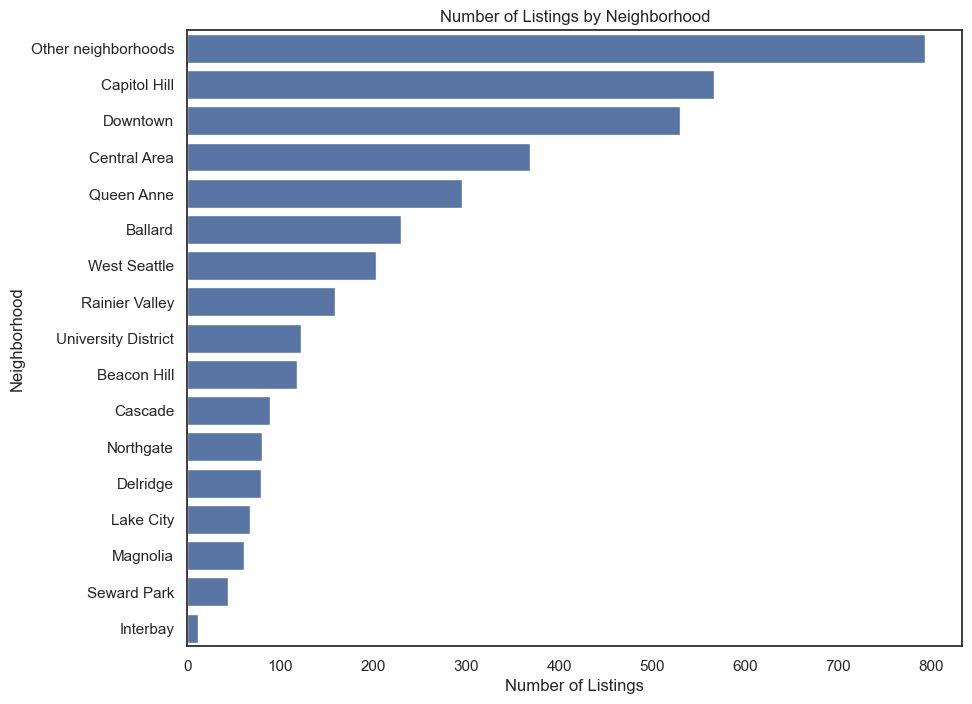

In [161]:
# Number of Listings by Neighborhood
plt.figure(figsize=(10, 8))
sns.countplot(data=listings_df, y='neighbourhood_group_cleansed', order=listings_df['neighbourhood_group_cleansed'].value_counts().index)
plt.title('Number of Listings by Neighborhood')
plt.xlabel('Number of Listings')
plt.ylabel('Neighborhood')
plt.savefig('Number of Listings by Neighborhood.png')
plt.show()

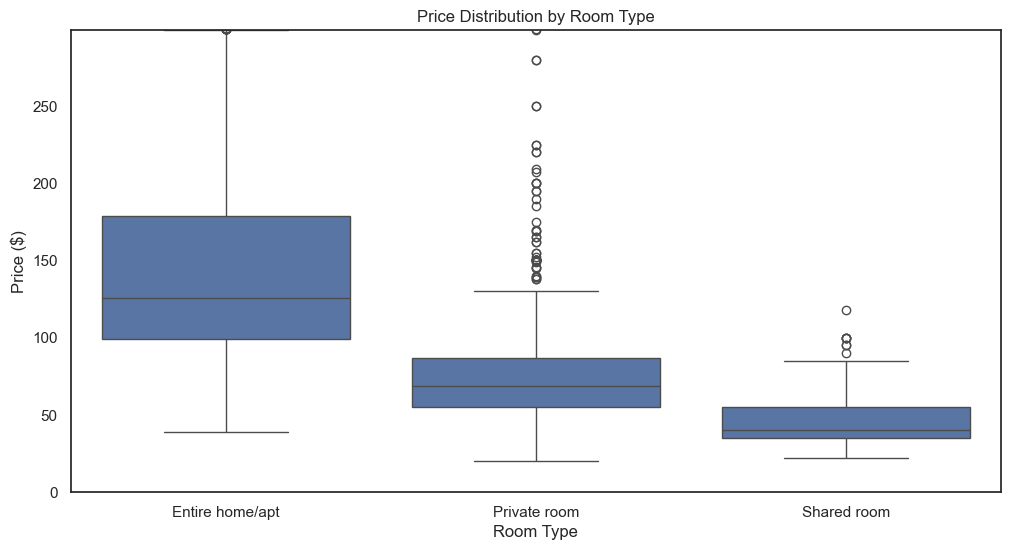

In [162]:
# Price by Room Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='price', data=listings_df)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.ylim(0, listings_df['price'].quantile(0.95))  # Limiting y-axis to 95th percentile for better visualization
plt.savefig('price_by_room_type.png')
plt.show()

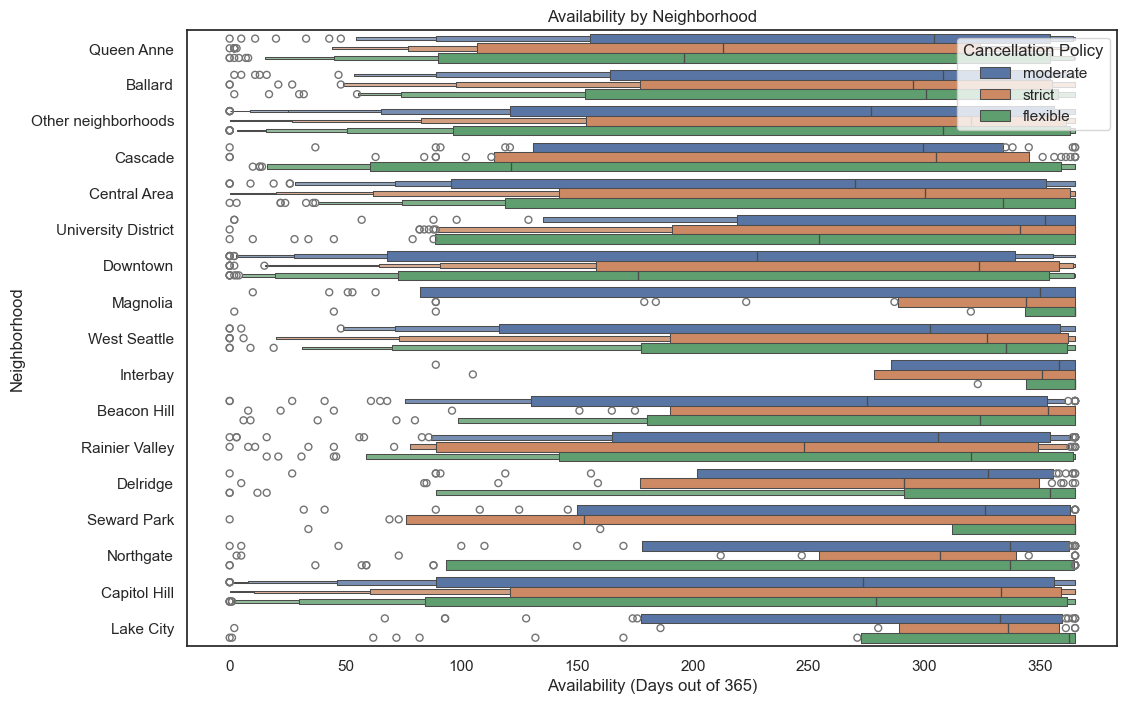

In [163]:
# Availability by Neighborhood
plt.figure(figsize=(12, 8))
sns.boxenplot(y='neighbourhood_group_cleansed', x='availability_365', hue='cancellation_policy', data=listings_df)
plt.title('Availability by Neighborhood')
plt.xlabel('Availability (Days out of 365)')
plt.ylabel('Neighborhood')

plt.legend(title='Cancellation Policy', loc='upper right')
plt.savefig('availability_by_neighborhood.png')
plt.show()

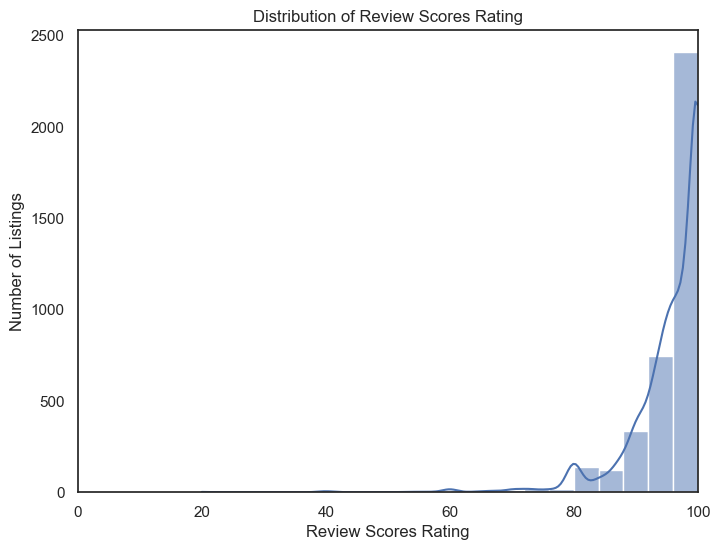

In [164]:
# Review Scores Rating Distribution
plt.figure(figsize=(8, 6))
sns.histplot(listings_df['review_scores_rating'], bins=20, kde=True)
plt.title('Distribution of Review Scores Rating')
plt.xlabel('Review Scores Rating')
plt.ylabel('Number of Listings')
plt.xlim(0, 100)  # Review scores are typically on a scale from 0 to 100
plt.savefig('review_scores_rating_distribution.png')
plt.show()

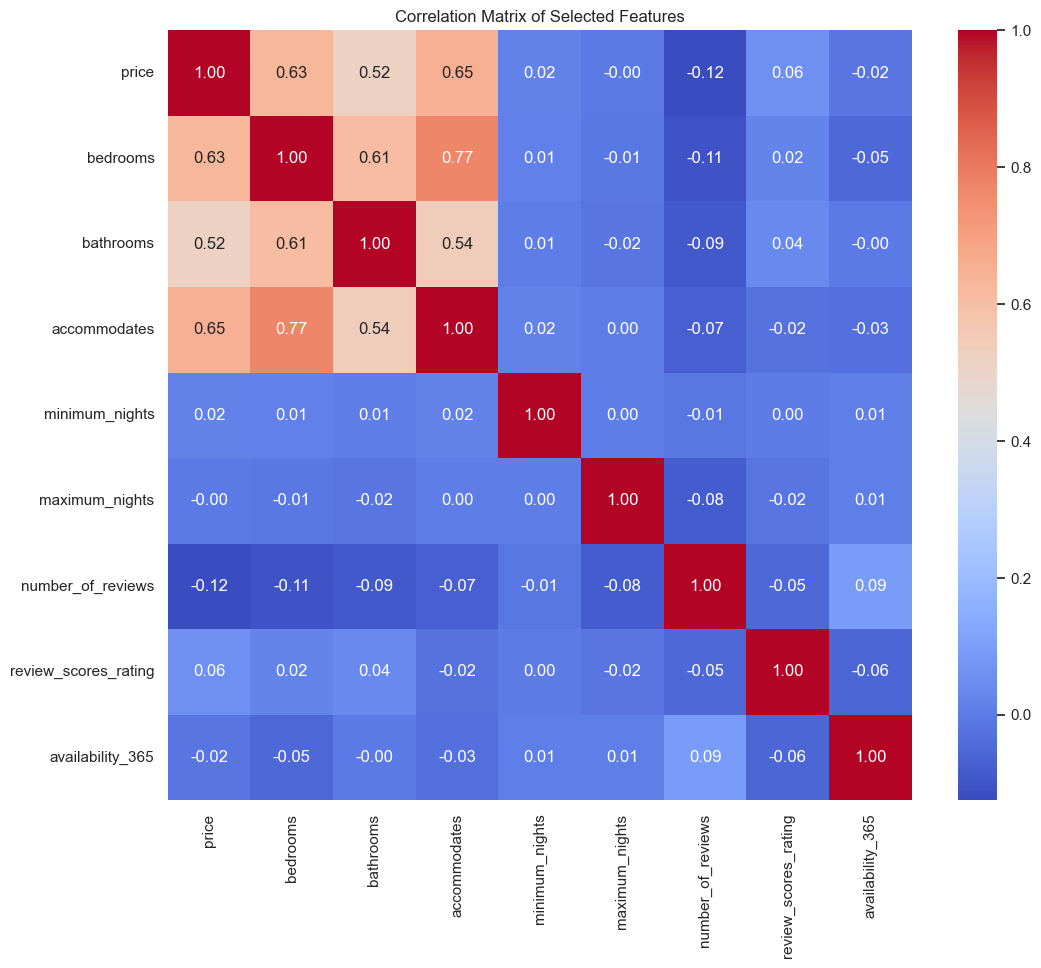

In [165]:
# Select relevant numerical columns for correlation analysis
numerical_columns = [
    'price', 'bedrooms', 'bathrooms', 'accommodates',
    'minimum_nights', 'maximum_nights', 'number_of_reviews',
    'review_scores_rating', 'availability_365'
]
# but all of these features are in the object type, so we need to convert them
for col in numerical_columns:
    listings_df[col] = pd.to_numeric(listings_df[col], errors='coerce')

# Calculate the correlation matrix
corr_matrix = listings_df[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Features')
plt.savefig('correlation_matrix.png')
plt.show()

### Reviewer feedback analysis

In [93]:
review_df = pd.read_csv('./data/reviews.csv')
review_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [94]:
review_df.date= pd.to_datetime(review_df.date)
review_df['year'] = review_df.date.dt.year
review_df['month'] = review_df.date.dt.month
review_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,year,month
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,2015,7
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,2015,7
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",2015,7
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,2015,8
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,2015,8


In [96]:
review_df.groupby(['year','month'])['comments'].size().reset_index()

,year,month,comments
0,2009,6,2
1,2009,7,1
2,2009,8,1
3,2009,9,2
4,2009,10,6
...,...,...,...
74,2015,9,6985
75,2015,10,5536
76,2015,11,3998
77,2015,12,3351


It's seem like the data is cut of at 2016, therefore, we will only use data from 2010 - 2015.

In [108]:
filter_year = review_df[(review_df['year']<2016) & (review_df['year']>2009)]
filter_year = filter_year.groupby(['year', 'month'])['comments'].size().reset_index()

In [109]:
filter_year['log_comments'] = np.log(filter_year.comments)

In [111]:
filter_year

,year,month,comments,log_comments
0,2010,1,3,1.098612
1,2010,2,3,1.098612
2,2010,3,7,1.945910
3,2010,4,5,1.609438
4,2010,5,10,2.302585
...,...,...,...,...
67,2015,8,7963,8.982561
68,2015,9,6985,8.851520
69,2015,10,5536,8.619027
70,2015,11,3998,8.293550


In [139]:
sns.set_style('white')

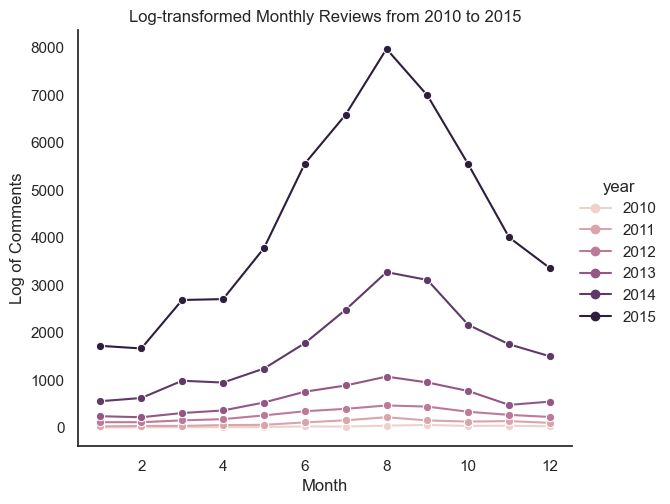

In [156]:
sns.relplot(data=filter_year, x='month',y='comments',
            hue='year', marker='o', kind='line', aspect=1.2)
ax = plt.gca()
ax.set_xlabel("Month")
ax.set_ylabel("Log of Comments")
ax.set_title("Log-transformed Monthly Reviews from 2010 to 2015")
plt.savefig('monthly_reviews_2010_2015.png')
plt.show()